In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
HERE = Path(_dh[-1])

In [3]:
pwd

'/home/aouidate/Desktop/Adnane/Adib'

## Convert mol2 to SDF
As Rdkit prefers SDF files, Here we will use Open babel package to convert mol2 moleucles to SDF

In [10]:
%%bash

obabel comp1_multi22-aligned.mol2 -O compounds.sdf

22 molecules converted


## Read the activities file

In [5]:
file = 'comp1_multi22-activiti'

In [6]:
with open(file, 'r') as lines : 
    activites = []
    names = []
    next(lines)
    for line in lines:
        acti = line.split('\t')[1]
        activites.append(float(acti))
        name = line.split('"')[1]
        names.append(str(name))

## Read the SDF file

Here we will read the sdf files and we will store them in a list of molecules called mols

In [7]:
mols = []
for m in Chem.SDMolSupplier('compounds.sdf'):
    if m is not None :
        mols.append(m)

In [8]:
len(mols)

22

### Draw molecules
We will draw them using MolsToGridImage tool

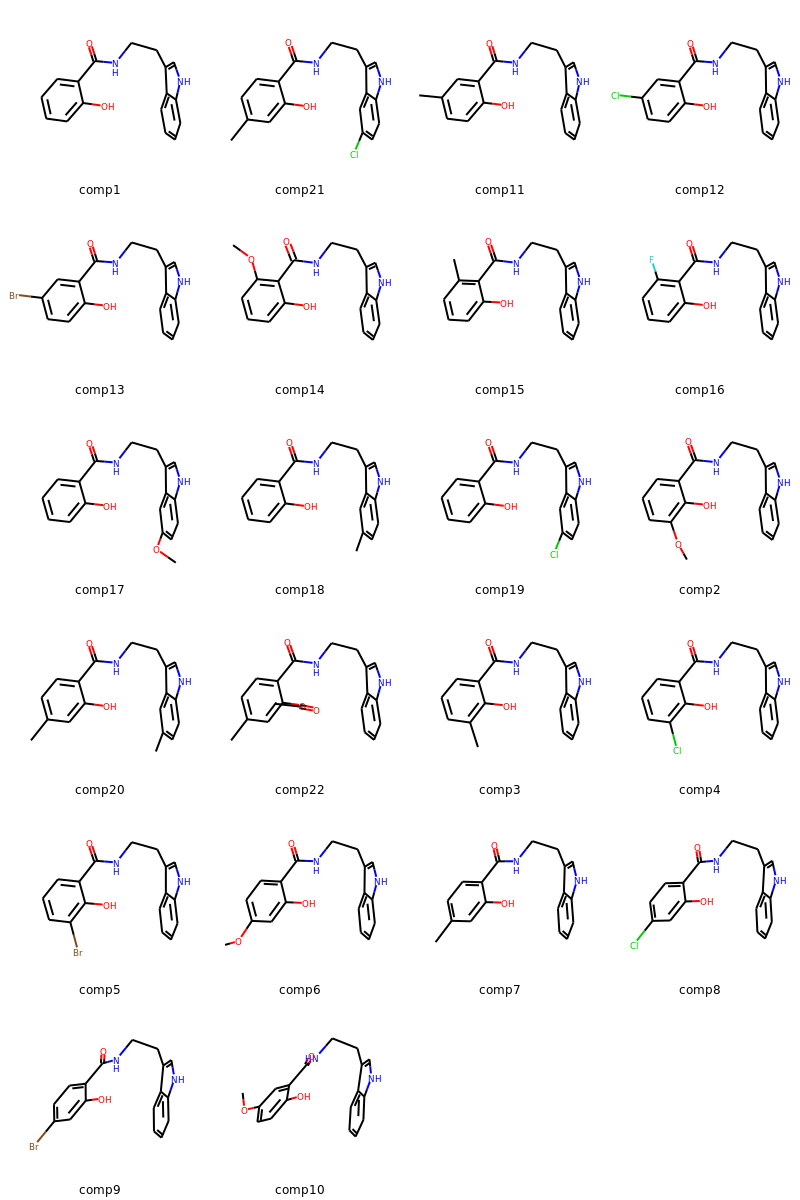

In [9]:
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, legends=names)

In [10]:
fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mols]

In [11]:
def fps_to_df(fps):
    columns = ['fingerprints']
    for fp in fps:
#         arr = np.zeros((1,))
#         DataStructs.ConvertToNumpyArray(fp, arr)
    
        return pd.DataFrame(fps, columns = columns)

In [12]:
df = fps_to_df(fps)
df.set_axis(names, inplace= True)
df['pIC50'] = activites

In [13]:
df

,fingerprints,pIC50
comp1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",8.09
comp21,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.36
comp11,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.22
comp12,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.87
comp13,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",6.31
comp14,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",12.29
comp15,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",13.05
comp16,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",9.99
comp17,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",12.05
comp18,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",4.53


## Divide the dataset into trainng and test sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(np.asarray(list(df['fingerprints'].values)), df['pIC50'].astype('float'), test_size=0.30, random_state=82)

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(np.asarray(list(df['fingerprints'].values)), df['pIC50'].astype('float'), test_size=0.20, random_state=62)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(list(df['fingerprints'].values)), df['pIC50'].astype('float'), test_size=0.20, random_state=39)

In [18]:
y_train.dtype

dtype('float64')

In [19]:
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler().fit(X_train)
# X_train = scale.transform(X_train)

In [20]:
# X_train

In [21]:
sum(df['pIC50'])/len(df['pIC50'])

9.473636363636365

## Create the different models 
### 1. import the modules

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

### 2 . Defining learning regressors

In [23]:
Reg_names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
        # "Naive_Bayes", #"QDA",
             "SGD"]

regressors = [
    KNeighborsRegressor(3),
    SVR(kernel="linear", C=0.025),
    SVR(kernel="poly", degree=3, C=0.025),
    SVR(kernel="rbf", C=1, gamma=2),
    GaussianProcessRegressor(1.0 * RBF(1.0)),
    GradientBoostingRegressor(n_estimators=100, learning_rate=1.0),
    DecisionTreeRegressor(max_depth=5),
    ExtraTreesRegressor(n_estimators=10, min_samples_split=2),
    RandomForestRegressor(max_depth=5, n_estimators=100),
    MLPRegressor(alpha=1, max_iter=1000),
    AdaBoostRegressor(n_estimators=100),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
    SGDRegressor(loss="squared_loss", penalty="l2")]

In [97]:
# def models (X_train,y_train, X_test, y_test):
#     #Training_evaluation
#     df = pd.DataFrame()
#     df1 = pd.DataFrame()
#     df2 = pd.DataFrame()
#     scoresT = []
#     MSET = []
#     # y_PredT = []
#     for name, reg in zip(Reg_names, regressors):
#         reg.fit(X_train, y_train)
#         score = reg.score(X_train, y_train)
#         scoresT.append(score)
#     #     predT = reg.predict(X_train)
#     #     y_PredT.append(predT)
#         mse = mean_squared_error(y_train, reg.predict(X_train))
#         MSET.append(mse)
#     df['names'] = Reg_names
#     df['scores'] = scoresT
#     df['MSE'] = MSET
#     #Test_set evaluation
#     scores = []
#     MSETest = []
#     for name, reg in zip(Reg_names, regressors):
#         reg.fit(X_train, y_train)
#         score = reg.score(X_test, y_test)
#         scores.append(score)
#         mse = mean_squared_error(y_test, reg.predict(X_test))
#         MSETest.append(mse)
#     df1['names'] = Reg_names
#     df1['scores'] = scoresT
#     df1['MSE'] = MSETest
#     #Y_randimization
#     scoresY = []
#     MSETestY = []
#     for name, reg in zip(Reg_names, regressors): 
#         for i in trange(100):
#             np.random.shuffle(y_train)
#             reg.fit(X_train, y_train)
#             score = reg.score(X_train, y_train)
#         scoresY.append(np.mean(score))
#     #     predT = reg.predict(X_train)
#     #     y_PredT.append(predT)
#         mse = mean_squared_error(y_train, reg.predict(X_train))
#         MSETestY.append(np.mean(mse))
#         df2 = pd.DataFrame()
#     df2['names'] = Reg_names
#     df2['scores'] = scoresY
#     df2['MSE'] = MSETestY
#     sns.set_style(style= 'whitegrid')
    
#     #drawing
    
#     f, (axs1, axs2, axs3) = plt.subplots(3, 2, sharey= True, figsize=(20,10))
#     #scores
#     sns.barplot(ax =axs1[0], x =df['scores'], y = df['names'] ).set(title='Scores of training set')
#     #MSE
#     sns.barplot(ax =axs1[1], x =df['MSE'], y = df['names'] ).set(title='MSE of training set')
#     #scores
#     sns.barplot(ax =axs2[0], x =df1['scores'], y = df1['names'] ).set(title='Scores of test set')
#     #MSE
#     sns.barplot(ax =axs2[1], x =df1['MSE'], y = df1['names'] ).set(title='MSE of test set')
#      #scores
#     sns.barplot(ax =axs3[0], x =df2['scores'], y = df2['names'] ).set(title='Scores of y-randomization')
#     #MSE
#     sns.barplot(ax =axs3[1], x =df2['MSE'], y = df2['names'] ).set(title='MSE of y-randomization')
#     return

# Define the functions

In [55]:
def training_evaluation(X_train, y_train, Reg_names, regressors):
    df = pd.DataFrame()
    scores = []
    MSE = []
    # y_PredT = []
    for name, reg in zip(Reg_names, regressors):
        reg.fit(X_train, y_train)
        score = reg.score(X_train, y_train)
        scores.append(score)
    #     predT = reg.predict(X_train)
    #     y_PredT.append(predT)
        mse = mean_squared_error(y_train, reg.predict(X_train))
        MSE.append(mse)
        df = pd.DataFrame()
    df['names'] = Reg_names
    df['scores'] = scores
    df['MSE'] = MSE
#     cm = sns.light_palette(color= 'green', as_cmap= True)
#     s = df.style.background_gradient(cmap= cm)
    return df

In [61]:
def test_evaluation(X_train, y_train, X_test, y_test, Reg_names, regressors):
    df = pd.DataFrame()
    scores = []
    MSE = []
    for name, reg in zip(Reg_names, regressors):
        reg.fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        scores.append(score)
        mse = mean_squared_error(y_test, reg.predict(X_test))
        MSE.append(mse)
    df['names'] = Reg_names
    df['scores'] = scores
    df['MSE'] = MSE
#     cm = sns.light_palette(color= 'red', as_cmap= True)
#     df = df.style.background_gradient(cmap= cm)
    return df

In [62]:
def Y_Randomization(X_train, y_train, Reg_names, regressors):
    "A function that performs a y-randomization and return a Dataframe"
    df = pd.DataFrame()
    scores = []
    MSE = []
    for name, reg in zip(Reg_names, regressors): 
        for i in range(100):
            np.random.shuffle(y_train)
            reg.fit(X_train, y_train)
            score = reg.score(X_train, y_train)
        scores.append(np.mean(score))
    #     predT = reg.predict(X_train)
    #     y_PredT.append(predT)
        mse = mean_squared_error(y_train, reg.predict(X_train))
        MSE.append(np.mean(mse))
    df['names'] = Reg_names
    df['scores'] = scores
    df['MSE'] = MSE
#     cm = sns.light_palette(color='Accent', as_cmap= True)
#     s = df.style.background_gradient(cmap_cm)
    return df

In [43]:
def plot_scores_MSE(df):
    fig, axes = plt.subplots(1, 2, sharey= True, figsize = (10,5))
    #scores
    sns.barplot(ax= axes[0], x= df['scores'], y = df['names'])
    #scores
    sns.barplot(ax= axes[1], x= df['MSE'], y = df['names'])
    return 

# Models building

## Training evaluation

In [58]:
df_training = training_evaluation(X_train, y_train, Reg_names= Reg_names, regressors=regressors,)

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarni

In [59]:
df_training

,names,scores,MSE
0,Nearest_Neighbors,0.229269,8.736367e+00
1,Linear_SVM,0.123382,9.936621e+00
2,Polynomial_SVM,-0.080807,1.225113e+01
3,RBF_SVM,0.406022,6.732846e+00
4,Gaussian_Process,1.000000,1.046007e-21
5,Gradient_Boosting,1.000000,5.847823e-09
6,Decision_Tree,0.993534,7.329118e-02
7,Extra_Trees,1.000000,2.041758e-30
8,Random_Forest,0.837248,1.844823e+00
9,Neural_Net,0.994741,5.961289e-02


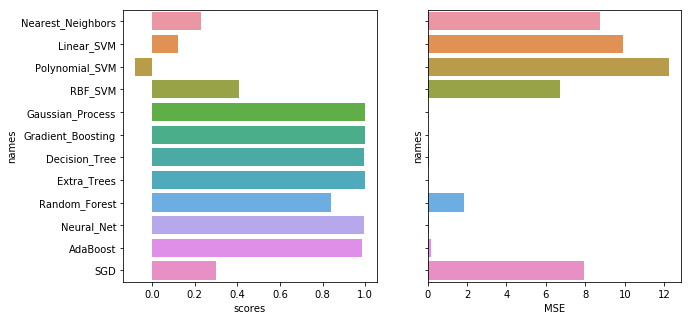

In [60]:
plot_scores_MSE(df = df_training)

## Test evaluation

In [71]:
df_test = test_evaluation(X_train, y_train, X_test, y_test, Reg_names, regressors,)

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarni

In [72]:
df_test

,names,scores,MSE
0,Nearest_Neighbors,-0.234477,8.662602
1,Linear_SVM,-1.175440,15.265550
2,Polynomial_SVM,-1.144549,15.048780
3,RBF_SVM,-1.073008,14.546760
4,Gaussian_Process,-0.607910,11.283068
5,Gradient_Boosting,-0.807089,12.680752
6,Decision_Tree,0.551232,3.149107
7,Extra_Trees,-0.126303,7.903520
8,Random_Forest,-0.230915,8.637606
9,Neural_Net,-0.714826,12.033316


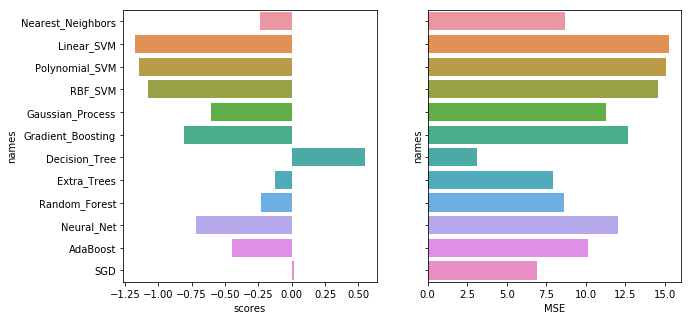

In [73]:
plot_scores_MSE(df = df_test)

## Y_ranomization

In [67]:
df_Y_rand = Y_Randomization(X_train, y_train, Reg_names, regressors,)

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anacond

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anacond

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

In [69]:
df_Y_rand

,names,scores,MSE
0,Nearest_Neighbors,0.197333,9.098367e+00
1,Linear_SVM,0.056662,1.069290e+01
2,Polynomial_SVM,-0.080807,1.225113e+01
3,RBF_SVM,0.406022,6.732848e+00
4,Gaussian_Process,1.000000,1.062821e-21
5,Gradient_Boosting,1.000000,3.033395e-08
6,Decision_Tree,0.815160,2.095191e+00
7,Extra_Trees,1.000000,2.041758e-30
8,Random_Forest,0.752782,2.802259e+00
9,Neural_Net,0.993308,7.585929e-02


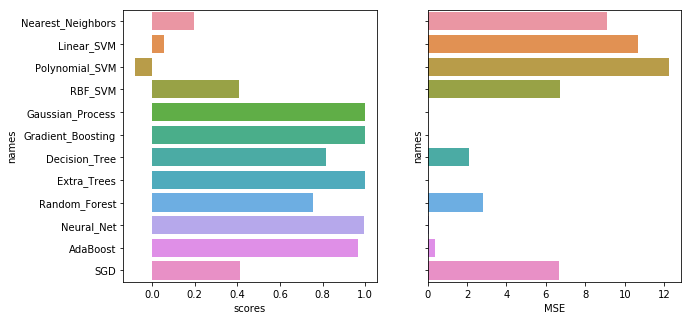

In [70]:
plot_scores_MSE(df_Y_rand)

## Bar plots for model performances

In [101]:
# sns.set_style(style= 'whitegrid')
# ax = sns.barplot(x = df['scores'], y = df['names'], data= df)

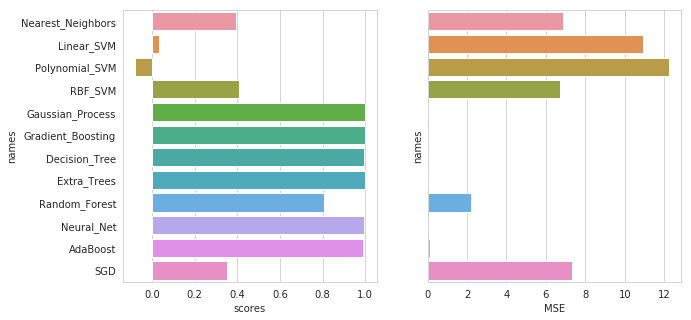

In [105]:
sns.set_style(style= 'whitegrid')
f, axs1 = plt.subplots(1, 2, sharey= True, figsize=(10,5))
#scores
sns.barplot(ax =axs1[0], x =df['scores'], y = df['names'] )
#MSE
sns.barplot(ax =axs1[1], x =df['MSE'], y = df['names'] )

# External validation with Test sets

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarni

## Obtained scores for test sets

In [114]:
def color_df(df, Reg_names, scores, MSE, color="green"):
    df = pd.DataFrame()
    df['names'] = Reg_names
    df['scores'] = scores
    df['MSE'] = MSETest
    cm = sns.light_palette(color= 'green', as_cmap= True )
    s = df.style.background_gradient(cmap=cm)
    return s

In [115]:
dfcolor_df(df=df1, Reg_names= Reg_names, scores= scoresT, MSE=MSETest)

,names,scores,MSE
0,Nearest_Neighbors,0.392764,8.844478
1,Linear_SVM,0.034196,18.247105
2,Polynomial_SVM,-0.080807,15.048781
3,RBF_SVM,0.406022,14.546762
4,Gaussian_Process,1.000000,17.288183
5,Gradient_Boosting,1.000000,2.872779
6,Decision_Tree,0.993824,27.864862
7,Extra_Trees,1.000000,13.725790
8,Random_Forest,0.807227,16.434558
9,Neural_Net,0.993912,15.404961


In [66]:
cm = sns.light_palette(color= 'green', as_cmap= True )
s1 = df1.style.background_gradient(cmap=cm)
s1

,names,scores,MSE
0,Nearest_Neighbors,0.024906,15.393602
1,Linear_SVM,0.039268,15.166870
2,Polynomial_SVM,-0.000712,15.798020
3,RBF_SVM,-0.000712,15.798019
4,Gaussian_Process,0.419424,9.165425
5,Gradient_Boosting,-0.373606,21.684817
6,Decision_Tree,-0.190766,18.798361
7,Extra_Trees,-0.134042,17.902869
8,Random_Forest,0.158578,13.283346
9,Neural_Net,0.228338,12.182065


In [75]:
 from tqdm.notebook import trange
scoresY = []
MSETestY = []
for name, reg in zip(Reg_names, regressors): 
    for i in trange(100):
        np.random.shuffle(y_train)
        reg.fit(X_train, y_train)
        score = reg.score(X_train, y_train)
    scoresY.append(np.mean(score))
#     predT = reg.predict(X_train)
#     y_PredT.append(predT)
    mse = mean_squared_error(y_train, reg.predict(X_train))
    MSETestY.append(np.mean(mse))

#         ypred = reg.predict(X)
#         shuffled_r2.append(r2_score(Y,ypred))
        
#     reg.fit(X_train, y_train)
#     score = reg.score(X_test, y_test)
#     scores.append(score)
#     mse = mean_squared_error(y_test, reg.predict(X_test))
#     MSETest.append(mse)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anacond

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/aouidate/anacond

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0

/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/aouidate/anaconda3/envs/F2D/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0

In [76]:
len(scoresY), len(MSETestY)

(12, 12)

In [77]:
df2 = pd.DataFrame()
df2['names'] = Reg_names
df2['scores'] = scoresY
df2['MSE'] = MSETestY
df2

,names,scores,MSE
0,Nearest_Neighbors,0.410031,5.551088e+00
1,Linear_SVM,0.156502,7.936579e+00
2,Polynomial_SVM,-0.051990,9.898299e+00
3,RBF_SVM,0.457028,5.108888e+00
4,Gaussian_Process,1.000000,1.117057e-21
5,Gradient_Boosting,1.000000,8.863099e-08
6,Decision_Tree,0.977469,2.119961e-01
7,Extra_Trees,1.000000,1.624125e-30
8,Random_Forest,0.861658,1.301674e+00
9,Neural_Net,0.996437,3.352852e-02


In [78]:
cm = sns.light_palette(color= 'green', as_cmap= True )
s1 = df2.style.background_gradient(cmap=cm)
s1

,names,scores,MSE
0,Nearest_Neighbors,0.410031,5.551088
1,Linear_SVM,0.156502,7.936579
2,Polynomial_SVM,-0.051990,9.898299
3,RBF_SVM,0.457028,5.108888
4,Gaussian_Process,1.000000,0.000000
5,Gradient_Boosting,1.000000,0.000000
6,Decision_Tree,0.977469,0.211996
7,Extra_Trees,1.000000,0.000000
8,Random_Forest,0.861658,1.301674
9,Neural_Net,0.996437,0.033529


## Mordred descriptors

In [68]:
from mordred import Calculator, descriptors

ModuleNotFoundError: No module named 'mordred'

## Mordred descriptors

In [74]:
calc = Calculator(descriptors, ignore_3D=True)

In [75]:
dfM = calc.pandas(mols)

100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 16.61it/s]


In [77]:
dfM.isnull().sum().sum()

0

In [81]:
XM_train, XM_test, yM_train, yM_test = train_test_split(dfM, 
                                                    df['pIC50'].astype('float'), 
                                                    test_size=0.20, 
                                                    random_state=982)

In [82]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

In [84]:
sel = DropCorrelatedFeatures(threshold=0.8,
                              method='pearson',
                              missing_values='ignore')
sel.fit(XM_train)

DropCorrelatedFeatures()

In [86]:
len(sel.features_to_drop_)

1008

In [87]:
# drop correlated features

XM1_train = sel.transform(XM_train)
XM1_test = sel.transform(XM_test)

XM1_train.shape, XM1_test.shape

((17, 605), (5, 605))

## SmartCorrelationSelection
### Model Performance


In [97]:
sel1 = SmartCorrelatedSelection(threshold=0.2,
                              method='pearson',
                              missing_values='ignore')
sel1.fit(XM1_train)

SmartCorrelatedSelection(threshold=0.2)

In [98]:
# drop correlated features

XM2_train = sel1.transform(XM1_train)
XM2_test = sel1.transform(XM1_test)

XM2_train.shape, XM2_test.shape

((17, 473), (5, 473))